<a href="https://colab.research.google.com/github/Akif-Mufti/Deep-learning-2.0/blob/master/Auto_encoder1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import dependencies
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
import zipfile
from urllib import request
import random

#importing the dataset

#url https://www.kaggle.com/zalando-research/fashionmnist

img_database = np.loadtxt('fashion-mnist_train.csv',delimiter =',',skiprows =1)[:,1:]
#looking at the shape of the file
print(img_database.shape)
total_num_images = (img_database.shape[0])



(60000, 784)


In [0]:
#defining the neural network 

n_input = 784 #image of size 28 X28
n_hidden_1 = 256 #first hidden layer
n_hidden_2 = 32 #second hidden layer
n_hidden_3 = 32 #third hidden layer
n_hidden_4 = 256 #fourth hidden layer
n_output = 784  

#hyper parameters (remain constant throughout the process

learning_rate = .1 #how the parameters will be adjusted at each step of the learning process
epochs = 100 #how many times we go through the training process
batch_size = 100 #how many training examples we are using at each step 
#eep_prop = tf.placeholder(tf.float32)

#building tensorflow graph

X = tf.placeholder(tf.float32, [None, n_input]) #[none, 784] [any number of training sets ]
Y = tf.placeholder(tf.float32, [None, n_output]) 

#defining the weights and biases

nn_weight = {"W1": tf.Variable(tf.truncated_normal([n_input,n_hidden_1])),
             "W2": tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
             "W3": tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
             "W4": tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4])),
             "W5": tf.Variable(tf.truncated_normal([n_hidden_4,n_output]))
            }
nn_bias = {
           "B1": tf.Variable(tf.truncated_normal([n_hidden_1])),
           "B2": tf.Variable(tf.truncated_normal([n_hidden_2])),
           "B3": tf.Variable(tf.truncated_normal([n_hidden_3])),
           "B4": tf.Variable(tf.truncated_normal([n_hidden_4])),
           "B5": tf.Variable(tf.truncated_normal([n_output]))
            }



#

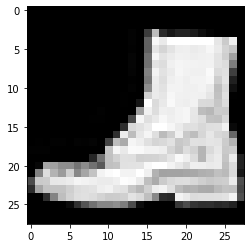

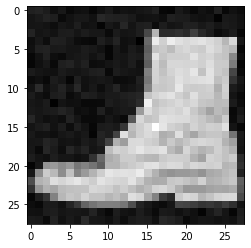

In [6]:
#creating a computatioal graph 

#for neural network
z1 = tf.add(tf.matmul(X, nn_weight["W1"]), nn_bias["B1"])
z1_out = tf.nn.sigmoid(z1)

z2 = tf.add(tf.matmul(z1_out, nn_weight["W2"]), nn_bias["B2"])
z2_out = tf.nn.sigmoid(z2)

z3 = tf.add(tf.matmul(z2_out, nn_weight["W3"]), nn_bias["B3"])
z3_out = tf.nn.sigmoid(z3)

z4 = tf.add(tf.matmul(z3_out, nn_weight["W4"]), nn_bias["B4"])
z4_out = tf.nn.sigmoid(z4)

z5 = tf.add(tf.matmul(z4_out, nn_weight["W5"]), nn_bias["B5"])
NN_out =(z5)

#implementeng nn using tesorflow api
z1 = tf.layers.dense(X,n_hidden_1, activation = tf.nn.sigmoid)

z2 = tf.layers.dense(z1,n_hidden_2, activation = tf.nn.sigmoid)
z3 = tf.layers.dense(z2,n_hidden_1, activation = tf.nn.sigmoid)
z4 = tf.layers.dense(z3,n_hidden_1, activation = tf.nn.sigmoid)

NN_out = tf.layers.dense(z4, output_layer)

#data preperation

#shuffling data set to avoid any bias

np.random.shuffle(img_database)
X_train = img_database

#normalize the data se

X_train = X_train

#create a noisy data set
X_train_noisy = X_train + 10*np.random.normal(0,1, size = X_train.shape)

#original image
plt.imshow(X_train[0].reshape(28,28), cmap = 'gray')
plt.show()
#noisy image
#
plt.imshow(X_train_noisy[0].reshape(28,28), cmap = 'gray')
plt.show()



Epoch 0 / 100 loss: 3752.8293
Epoch 1 / 100 loss: 3357.2988
Epoch 2 / 100 loss: 3240.0938
Epoch 3 / 100 loss: 3122.5955
Epoch 4 / 100 loss: 3109.4678
Epoch 5 / 100 loss: 2987.5588
Epoch 6 / 100 loss: 2790.442
Epoch 7 / 100 loss: 2713.8804
Epoch 8 / 100 loss: 2779.2236
Epoch 9 / 100 loss: 2713.927
Epoch 10 / 100 loss: 2667.7964
Epoch 11 / 100 loss: 2592.3015
Epoch 12 / 100 loss: 2625.7507
Epoch 13 / 100 loss: 2646.0498
Epoch 14 / 100 loss: 2530.0188
Epoch 15 / 100 loss: 2454.1548
Epoch 16 / 100 loss: 2502.8633
Epoch 17 / 100 loss: 2450.093
Epoch 18 / 100 loss: 2430.7
Epoch 19 / 100 loss: 2508.7036
Epoch 20 / 100 loss: 2399.183
Epoch 21 / 100 loss: 2379.2458
Epoch 22 / 100 loss: 2439.1372
Epoch 23 / 100 loss: 2392.5276
Epoch 24 / 100 loss: 2442.1858
Epoch 25 / 100 loss: 2382.2124
Epoch 26 / 100 loss: 2480.058
Epoch 27 / 100 loss: 2475.3435
Epoch 28 / 100 loss: 2486.1265
Epoch 29 / 100 loss: 2442.9487
Epoch 30 / 100 loss: 2353.356
Epoch 31 / 100 loss: 2344.3682
Epoch 32 / 100 loss: 2314.6

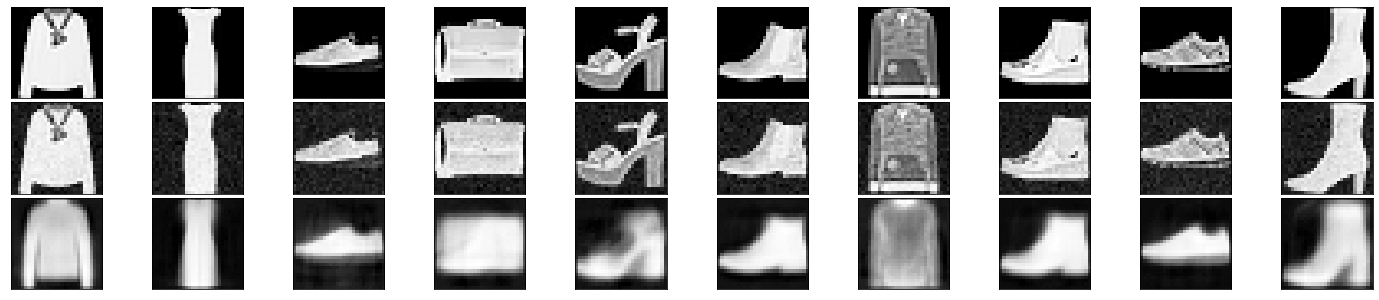

In [8]:
#define the metrics

#loss function
computed_loss = tf.reduce_mean(tf.square(NN_out - Y))

#defining optimizer
optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(computed_loss)

#Initialise the variables
init = tf.global_variables_initializer()

#initialize the session
sess = tf.Session()
sess.run(init)
for epoch in range(epochs):
  for i in range(int(total_num_images/batch_size)):
    X_epoch = X_train[ i*batch_size : (i+1)*batch_size ]
    X_noise_epoch = X_train_noisy[ i*batch_size : (i+1)*batch_size ]
    _, loss = sess.run([optimizer, computed_loss], feed_dict ={X: X_noise_epoch, Y: X_epoch})
  print('Epoch', epoch, '/',epochs, 'loss:',loss)

#pick any image
X_actual = X_train[20:30]
noisy_image = X_train_noisy[20:30]

#run it throgh auto encoderg
denoised_image = sess.run(NN_out, feed_dict = {X: noisy_image})

#print the original image
fig, axes = plt.subplots(nrows=3,ncols=10,sharex=True,sharey=True, figsize = (20,4))
for images, row in zip([X_actual, noisy_image,denoised_image], axes):
  for img, ax in zip(images, row):
    ax.imshow(img.reshape((28,28)), cmap = 'Greys_r')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
fig.tight_layout(pad = 0.1)

